Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9370  0.9348  0.9324  0.9401  0.9365  0.9362  0.0025  
Fit time          0.78    0.82    0.84    0.78    0.79    0.80    0.02    
Test time         0.13    0.14    0.10    0.13    0.14    0.13    0.02    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9206  0.9175  0.9254  0.9234  0.9094  0.9193  0.0056  
Fit time          14.17   14.22   14.37   14.21   14.23   14.24   0.07    
Test time         2.56    2.62    2.55    2.60    2.52    2.57    0.04    
Найкращий алгоритм: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001D3112001F0>, RMSE: 0.9192777388805069


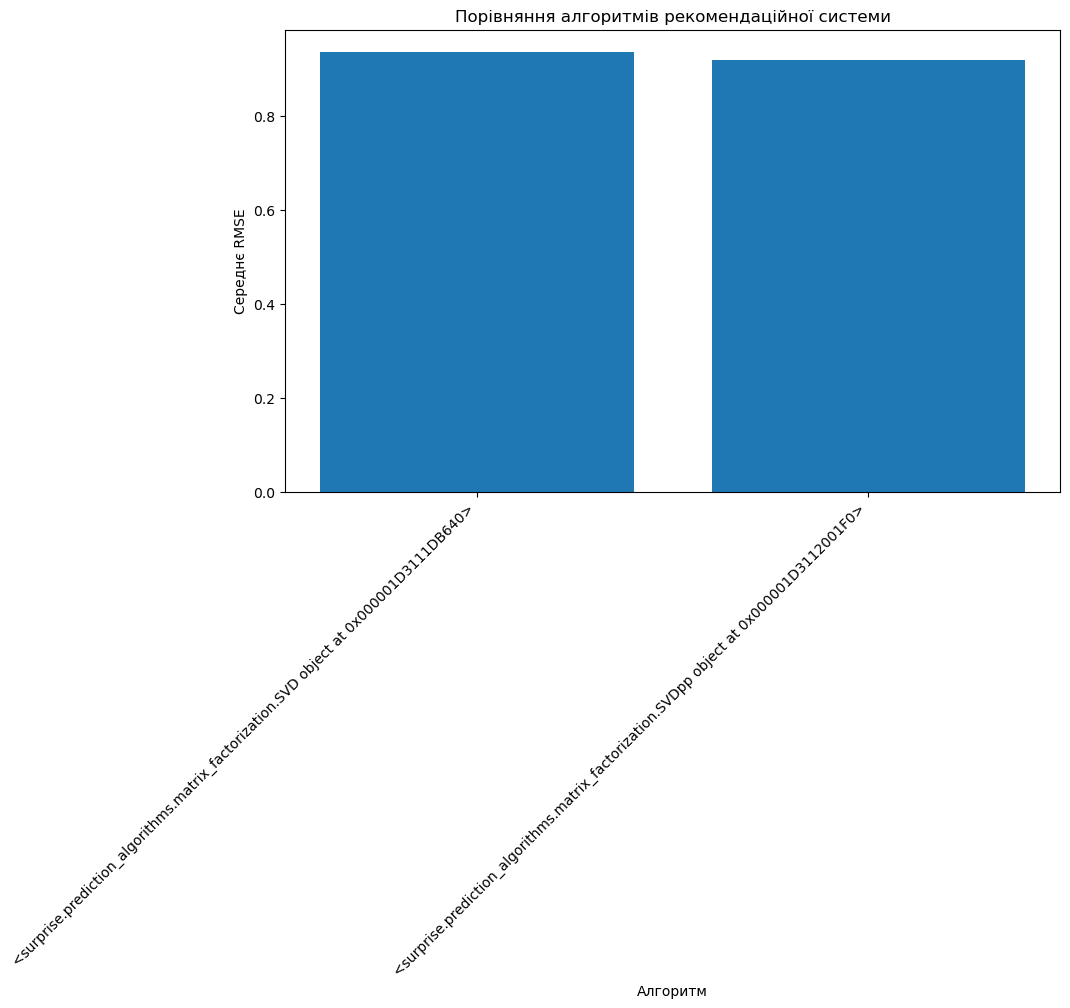

In [1]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

# Завантаження датасету MovieLens-100k
data = Dataset.load_builtin('ml-100k')

# Визначення моделі для кожного алгоритму (SVD, SVDpp)
svd = surprise.SVD()
svdpp = surprise.SVDpp()


# Виконання крос-валідацію для кожного алгоритму та збережіть результати
models = [svd, svdpp]
results = []

for model in models:
    result = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)
    results.append((model, result["test_rmse"].mean()))

# Знаходження оптимального алгоритму (мінімальне значення RMSE)
best_model, best_rmse = min(results, key=lambda x: x[1])
print(f"Найкращий алгоритм: {best_model}, RMSE: {best_rmse}")

# Візуалізація результатів
algorithms = [model for model, _ in results]
rmse_values = [rmse for _, rmse in results]

plt.figure(figsize=(10, 6))
plt.bar(range(len(algorithms)), rmse_values, tick_label=[str(model) for model in algorithms])
plt.xlabel('Алгоритм')
plt.ylabel('Середнє RMSE')
plt.title('Порівняння алгоритмів рекомендаційної системи')
plt.xticks(rotation=45, ha='right')
plt.show()

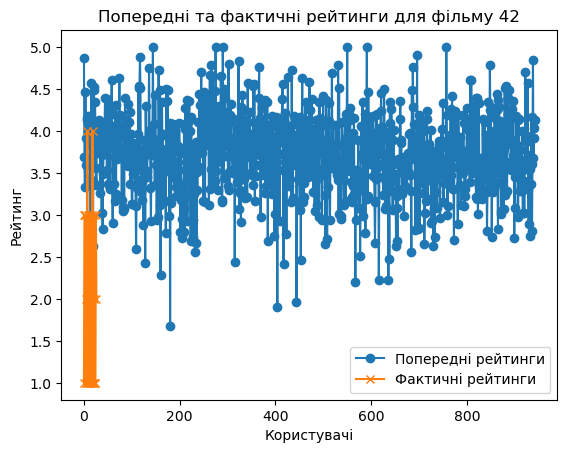

In [2]:
import matplotlib.pyplot as plt

# Вибір фільмів або користувачів
movie_id = 42 

# Отримання передбачених рейтингів для обраного фільму (або користука) з моделі SVDpp
predictions = []  # Тут зберігаються передбачені рейтинги
for user_id in range(1, 944):  # Це діапазон ID користувачів з датасету
    prediction = best_model.predict(str(user_id), str(movie_id))
    predictions.append(prediction.est)

# Отримання фактичних рейтингів для обраного фільму (або користука) з датасету
actual_ratings = []  # Тут зберігаються фактичні рейтинги
for user_id, item_id, rating in data.build_full_trainset().all_ratings():
    if item_id == movie_id:  # Перевірка, чи це фільм, який нас цікавить
        actual_ratings.append(rating)

# Побудова графіку
plt.plot(predictions, label='Попередні рейтинги', marker='o')
plt.plot(actual_ratings, label='Фактичні рейтинги', marker='x')
plt.xlabel('Користувачі')
plt.ylabel('Рейтинг')
plt.title(f'Попередні та фактичні рейтинги для фільму {movie_id}')
plt.legend()
plt.show()

In [3]:
#Висновки.Обраний фільм за його ідентифікатором (movie_id) і побудуваний графік з передбаченими та фактичними рейтингами для фільму Clerks (1994). 
#Ця візуалізація допомагає оцінити, наскільки добре алгоритм SVDpp передбачає рейтинги для вибраних об'єктів і порівняти їх з фактичними